In [25]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from ipywidgets import interact, Button
import ipywidgets as widgets
import scipy.ndimage as ndimage
from scipy.optimize import curve_fit
from matplotlib.patches import Circle
import xarray

In [2]:
sys.path.insert(1, os.path.join(os.path.join(os.path.abspath(""), os.pardir), os.pardir))
import neurotorch as neuro
neuro.Start_Background()
%matplotlib inline

In [4]:
frames = neuro.API.Peaks()
print(frames)
synapses = neuro.API.DetectedSynapses()
for s in synapses:
    print(s.GetUniqueName())

[101 110 120 130 140 160 170 180 190]
((118, 105), r=6, f=
((146, 118), r=6, f=
((433, 123), r=6, f=
((237, 135), r=6, f=
((439, 158), r=6, f=


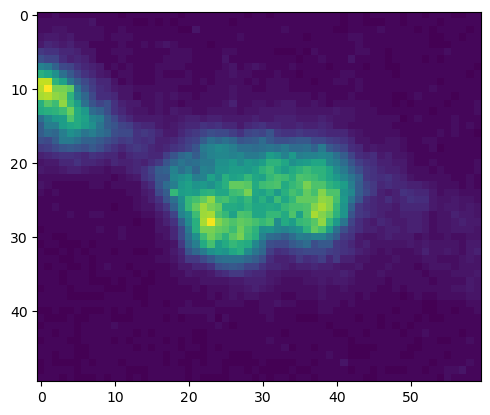

interactive(children=(IntSlider(value=0, description='peak', max=8), Output()), _dom_classes=('widget-interact…

<function __main__.Plot(peak)>

In [44]:
# Synapse 4 (237,135)
loc = synapses[1].location
bbox = (loc[0]-30, loc[1]-25, loc[0]+30, loc[1]+25) # (X0, Y0, X1, Y1)
plt.imshow(neuro.API_IMG().imgDiffMaxTime[bbox[1]:bbox[3],bbox[0]:bbox[2]])
plt.show()

_diffMax = np.max(neuro.API_IMG().imgDiff)

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def Plot(peak):
    global _diffMax, frames, xsclice, ysclice
    fig = plt.figure(figsize=(13,5))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    img = neuro.API_IMG().imgDiff[frames[peak], bbox[1]:bbox[3], bbox[0]:bbox[2]]
    xsclice = np.max(img, axis=0)
    xsclice_X = range(len(xsclice))
    ysclice = np.max(img, axis=1)
    ysclice_X = range(len(ysclice))
    ax1.imshow(img, vmin=0, vmax=_diffMax)
    ax2.plot(xsclice)
    ax3.plot(ysclice)

    try:
        poptX,pcovX = curve_fit(gaus, xsclice_X, xsclice, p0=(1,30,1))
        pstdX = np.sqrt(np.diag(pcovX))
        fitXSlice_Y = gaus(xsclice_X, *poptX)
        ax2.set_title(f"X Slice\nx= {round(poptX[1],2)} ± {round(pstdX[1],2)}, σ = {round(poptX[2],2)} ± {round(pstdX[2],2)}")
        ax2.plot(fitXSlice_Y)
    except RuntimeError:
        print("X Fit not possible")
    
    try:
        poptY,pcovY = curve_fit(gaus, ysclice_X, ysclice, p0=(1,30,1))
        pstdY = np.sqrt(np.diag(pcovY))
        fitYSlice_Y = gaus(ysclice_X, *poptY)
        ax3.set_title(f"Y Slice\ny= {round(poptY[1],2)} ± {round(pstdY[1],2)}, σ = {round(poptY[2],2)} ± {round(pstdY[2],2)}")
        ax3.plot(fitYSlice_Y)
    except RuntimeError:
        print("Y Fit not possible")

    if 'poptY' in locals() and 'poptX' in locals():
        gaussCenter = (poptX[1], poptY[1])
        c = Circle(gaussCenter, 1, color="red", fill=False)
        ax1.add_patch(c)
        
    plt.show()

interact(Plot, peak=widgets.IntSlider(min=0, max=len(frames)-1))
